In [27]:
from PBP.datasources import ChunkDS
from PBP.objfuncs import Accuracy, Fscore
from PBP.models import SKlearnWrapper, FrontierSelection

import numpy as np
from tqdm import tqdm_notebook
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ds = ChunkDS(samples=5 * 1e5)
ds.normalize_data()
ds_train, ds_dev = ds.train_dev_split(0.75)

accuracy = Accuracy()
fscore = Fscore()

## Weighted LogReg

In [11]:
balance_score_train = []
balance_score_dev = []

explore = np.logspace(0.2, 1., 40)
for w in tqdm_notebook(explore):
    weightedLogReg = SKlearnWrapper(LogisticRegression(class_weight={1: w, 
                                                                     0: 1.}))
    weightedLogReg.fit(ds_train)
    balance_score_train.append(fscore.evaluate(weightedLogReg.predict(ds_train), 
                                                         ds_train.getData().loc[:, ds_train.getLabel()]))
    balance_score_dev.append(fscore.evaluate(weightedLogReg.predict(ds_dev), 
                                                         ds_dev.getData().loc[:, ds_dev.getLabel()]))

HBox(children=(IntProgress(value=0, max=40), HTML(value='')))

/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


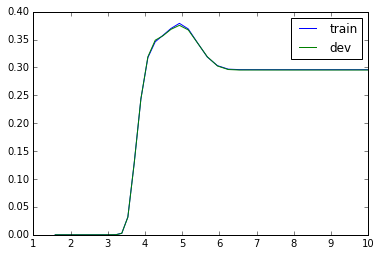

In [12]:
plt.plot(explore, balance_score_train, label = "train")
plt.plot(explore, balance_score_dev, label = "dev")
plt.legend()
#plt.xscale("log")

## Weighted XGBoost

In [23]:
balance_score_train = []
balance_score_dev = []

explore = np.logspace(0.2, 1., 40)
for w in tqdm_notebook(explore):
    class_weight = {1: w, 
                    0: 1.}
    sample_weight_data = ds_train.getData().loc[:, ds_train.getLabel()].map(lambda x: class_weight[x])
    
    weightedXGB = SKlearnWrapper(XGBClassifier(colsample_bytree=.5, subsample=.95, max_depth=3, n_estimators=30))
    weightedXGB.fit(ds_train, sample_weight = sample_weight_data)
    balance_score_train.append(fscore.evaluate(weightedXGB.predict(ds_train), 
                                                         ds_train.getData().loc[:, ds_train.getLabel()]))
    balance_score_dev.append(fscore.evaluate(weightedXGB.predict(ds_dev), 
                                                         ds_dev.getData().loc[:, ds_dev.getLabel()]))

HBox(children=(IntProgress(value=0, max=40), HTML(value='')))

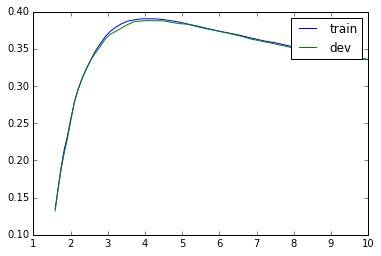

In [26]:
plt.plot(explore, balance_score_train, label = "train")
plt.plot(explore, balance_score_dev, label = "dev")
plt.legend()
#plt.xscale("log")

In [37]:
balance_score_train = []
balance_score_dev = []

explore = np.logspace(0.2, 1., 40)
for w in tqdm_notebook(explore):
    class_weight = {1: w, 
                    0: 1.}
    sample_weight_data = ds_train.getData().loc[:, ds_train.getLabel()].map(lambda x: class_weight[x])
    
    weightedXGB = SKlearnWrapper(XGBClassifier(colsample_bytree=.5, subsample=.7, max_depth=3, n_estimators=30))
    weightedXGB.fit(ds_train, sample_weight = sample_weight_data)
    balance_score_train.append(fscore.evaluate(weightedXGB.predict(ds_train), 
                                                         ds_train.getData().loc[:, ds_train.getLabel()]))
    balance_score_dev.append(fscore.evaluate(weightedXGB.predict(ds_dev), 
                                                         ds_dev.getData().loc[:, ds_dev.getLabel()]))

HBox(children=(IntProgress(value=0, max=40), HTML(value='')))

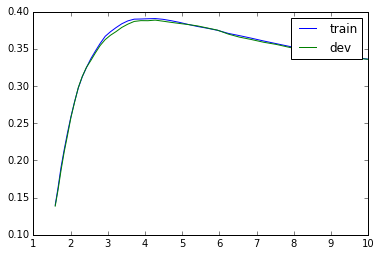

In [38]:
plt.plot(explore, balance_score_train, label = "train")
plt.plot(explore, balance_score_dev, label = "dev")
plt.legend()
#plt.xscale("log")

In [39]:
balance_score_train = []
balance_score_dev = []

explore = np.logspace(0.2, 1., 40)
for w in tqdm_notebook(explore):
    class_weight = {1: w, 
                    0: 1.}
    sample_weight_data = ds_train.getData().loc[:, ds_train.getLabel()].map(lambda x: class_weight[x])
    
    weightedXGB = SKlearnWrapper(XGBClassifier(colsample_bytree=.5, subsample=.7, max_depth=3, n_estimators=60))
    weightedXGB.fit(ds_train, sample_weight = sample_weight_data)
    balance_score_train.append(fscore.evaluate(weightedXGB.predict(ds_train), 
                                                         ds_train.getData().loc[:, ds_train.getLabel()]))
    balance_score_dev.append(fscore.evaluate(weightedXGB.predict(ds_dev), 
                                                         ds_dev.getData().loc[:, ds_dev.getLabel()]))

HBox(children=(IntProgress(value=0, max=40), HTML(value='')))

In [40]:
plt.plot(explore, balance_score_train, label = "train")
plt.plot(explore, balance_score_dev, label = "dev")
plt.legend()
#plt.xscale("log")

# weighted Adaboost + LogReg

In [34]:
balance_score_train = []
balance_score_dev = []

explore = np.logspace(0.2, 1., 40)
for w in tqdm_notebook(explore):
    class_weight = {1: w, 
                    0: 1.}
    sample_weight_data = ds_train.getData().loc[:, ds_train.getLabel()].map(lambda x: class_weight[x])

    weightedAdaBoost = SKlearnWrapper(AdaBoostClassifier(LogisticRegression(), n_estimators = 10))
    weightedAdaBoost.fit(ds_train, sample_weight = sample_weight_data.values)
    balance_score_train.append(fscore.evaluate(weightedAdaBoost.predict(ds_train),
                                                         ds_train.getData().loc[:, ds_train.getLabel()]))
    balance_score_dev.append(fscore.evaluate(weightedAdaBoost.predict(ds_dev), 
                                                         ds_dev.getData().loc[:, ds_dev.getLabel()]))


HBox(children=(IntProgress(value=0, max=40), HTML(value='')))

/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])
/Users/marc/Documents/Stanford/Class/CS229/projet/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid 

In [36]:
plt.plot(explore, balance_score_train, label = "train")
plt.plot(explore, balance_score_dev, label = "dev")
plt.legend()
#plt.xscale("log")